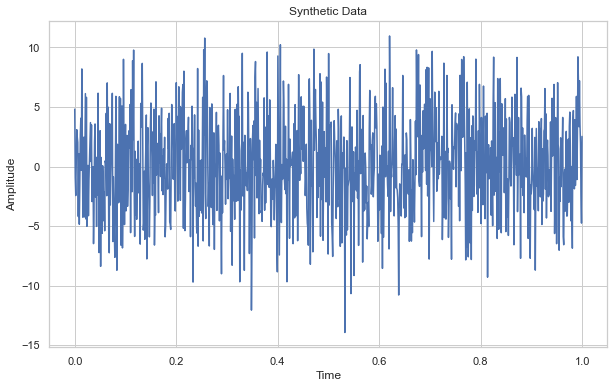

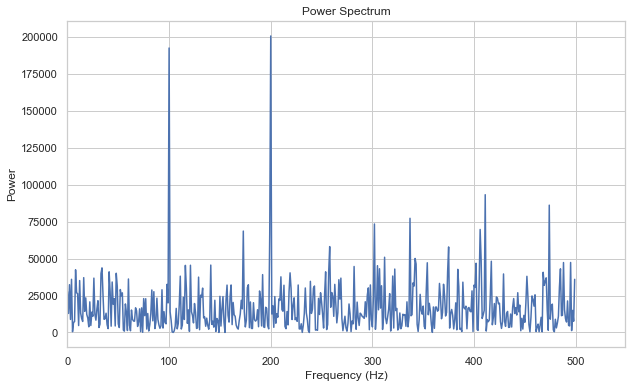

Recovered frequencies from spectrum: [-200.  200.]


In [2]:
#Testing the code with fake data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Parameters for synthetic data
num_samples = 1000
sampling_rate = 1000  # Hz
freq1 = 100  # Hz
freq2 = 200  # Hz
noise_level = 4
time = np.linspace(0, 1, num_samples)

# Generate synthetic data
def generate_synthetic_data(num_sample, freq1, freq2, noise_level, t = np.linspace(0, 1, num_samples)):
    signal1 = np.sin(2 * np.pi * freq1 * t)
    signal2 = np.sin(2 * np.pi * freq2 * t)
    noise = np.random.normal(0, noise_level, num_sample)
    synthetic_data = signal1 + signal2 + noise
    return synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_samples, freq1, freq2, noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('synthetic_data.png')
plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, )
plt.savefig('power_spectrum_synthetic.png')
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
print("Recovered frequencies from spectrum:", peak_freqs)


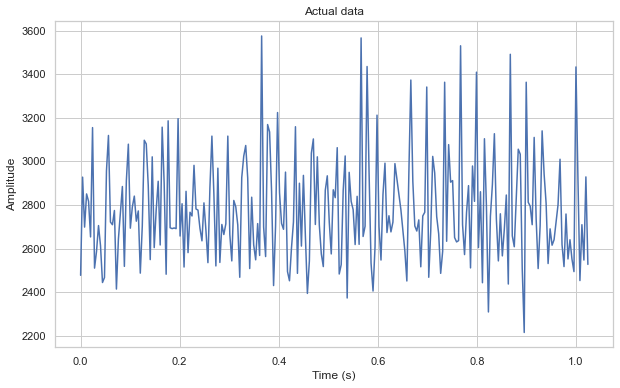

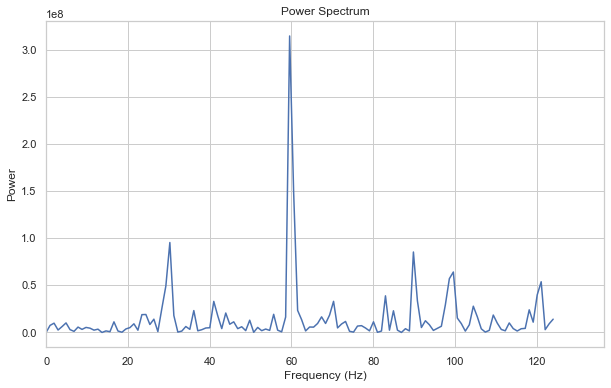

Recovered frequencies from spectrum: [  83.0078125  -83.0078125  120.1171875 -120.1171875   29.296875
  -29.296875   121.09375   -121.09375    -98.6328125   98.6328125
  -99.609375    99.609375    89.84375    -89.84375    -30.2734375
   30.2734375  -60.546875    60.546875   -59.5703125   59.5703125]
Power of peaks: [3.89064808e+07 3.89064808e+07 3.98419404e+07 3.98419404e+07
 4.94164063e+07 4.94164063e+07 5.38588470e+07 5.38588470e+07
 5.71171975e+07 5.71171975e+07 6.41952923e+07 6.41952923e+07
 8.54356971e+07 8.54356971e+07 9.55060162e+07 9.55060162e+07
 1.49044562e+08 1.49044562e+08 3.14806446e+08 3.14806446e+08]


In [3]:
data = np.genfromtxt('pulsar.dat') #import data
number_of_samples = len(data)
periodsample = 0.004 # seconds
time = np.linspace(0, number_of_samples*periodsample, number_of_samples)

# Plot actual data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=data)
plt.title('Actual data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sampling_rate = 1/periodsample  # per milli second

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0,)
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-20:]  # Get indices of two highest peaks
freqs_actual = frequencies[peaks_idx]  # Get corresponding frequencies
powers_actual = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", freqs_actual)
print("Power of peaks:", powers_actual)


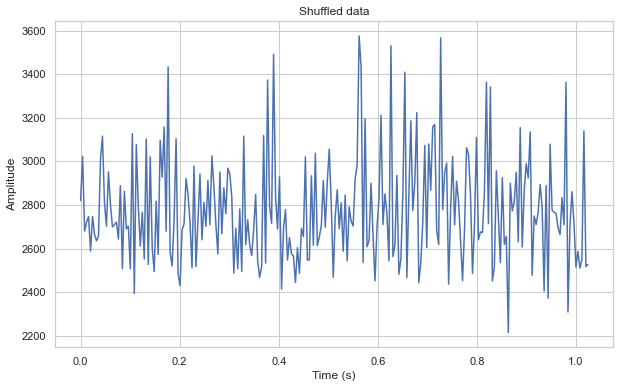

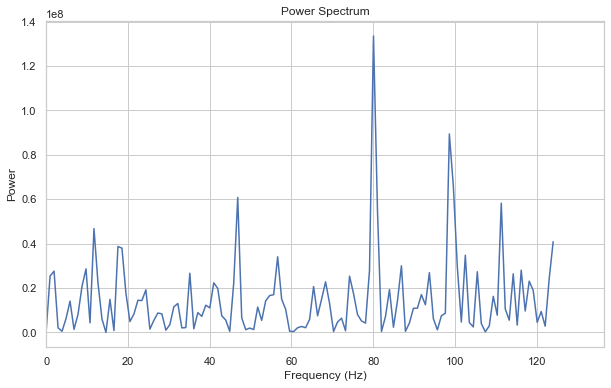

Recovered frequencies from spectrum: [80.078125]
Power of the peaks: [1.33552478e+08]


In [4]:
# Shuffle data up
rng = np.random.default_rng()
shuffled = data.copy()
rng.shuffle(shuffled)
if np.array_equal(data, shuffled):
    print("Data is not shuffled")


# Plot shuffled data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=shuffled)
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Perform shuffled Fourier transform
frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)

# Plot the shuffled power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant, non varying luminosity
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0,)
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-1:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
peak_power = power_spectrum[peaks_idx]  # Get corresponding power
print("Recovered frequencies from spectrum:", peak_freqs)
print("Power of the peaks:", peak_power)


In [5]:
peaks = np.zeros(100000000)

In [6]:
n_trials = 10000000
"""

peaks = np.zeros(n_trials)
for i in range(n_trials):   
    shuffled = data.copy()
    rng.shuffle(shuffled)
    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)
    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
    peak_power = power_spectrum[peaks_idx]  # Get corresponding power
    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity
    peaks[i] = peak_power[0]
print(peaks)
np.save('peaks.npy', peaks)
"""

'\n\npeaks = np.zeros(n_trials)\nfor i in range(n_trials):   \n    shuffled = data.copy()\n    rng.shuffle(shuffled)\n    frequencies, power_spectrum = recover_frequencies(shuffled, sampling_rate)\n    peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks\n    peak_power = power_spectrum[peaks_idx]  # Get corresponding power\n    #print("Power of the peaks:", peak_power[0]) # Power of the second highest peak, as highest is with zero frequency, the constant luminosity\n    peaks[i] = peak_power[0]\nprint(peaks)\nnp.save(\'peaks.npy\', peaks)\n'

In [7]:
peaks = np.load('peaks.npy')
above_1st_peak = (peaks > powers_actual[-1]).sum()
print("Number of peaks above the 1st peak in the actual data:", above_1st_peak, "at frequency:", freqs_actual[-1], "Hz")
above_2nd_peak = (peaks > powers_actual[-3]).sum()
print("Number of peaks above the 2nd peak in the actual data:", above_2nd_peak, "at frequency:", freqs_actual[-3], "Hz")
above_3rd_peak = (peaks > powers_actual[-5]).sum()
print("Number of peaks above the 3rd peak in the actual data:", above_3rd_peak, "at frequency:", freqs_actual[-5], "Hz")
above_4th_peak = (peaks > powers_actual[-7]).sum()
print("Number of peaks above the 4th peak in the actual data:", above_4th_peak, "at frequency:", freqs_actual[-8], "Hz")
above_5th_peak = (peaks > powers_actual[-9]).sum()
print("Number of peaks above the 5th peak in the actual data:", above_5th_peak, "at frequency:", freqs_actual[-9], "Hz")

chance1st = above_1st_peak/n_trials
chance2nd = above_2nd_peak/n_trials
chance3rd = above_3rd_peak/n_trials
chance4th = above_4th_peak/n_trials
chance5th = above_5th_peak/n_trials

Number of peaks above the 1st peak in the actual data: 27 at frequency: 59.5703125 Hz
Number of peaks above the 2nd peak in the actual data: 58653 at frequency: 60.546875 Hz
Number of peaks above the 3rd peak in the actual data: 1931390 at frequency: 30.2734375 Hz
Number of peaks above the 4th peak in the actual data: 3531769 at frequency: 89.84375 Hz
Number of peaks above the 5th peak in the actual data: 8701951 at frequency: 99.609375 Hz


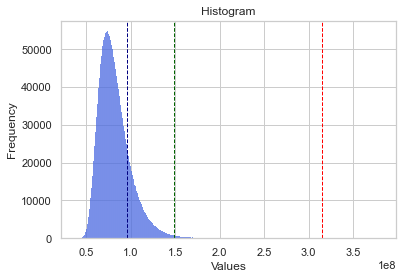

In [8]:
# Create histogram using Seaborn
sns.histplot(peaks, kde=False, color='royalblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.axvline(powers_actual[-1], color='red', linestyle='dashed', linewidth=1)
plt.axvline(powers_actual[-3], color='darkgreen', linestyle='dashed', linewidth=1)
plt.axvline(powers_actual[-5], color='navy', linestyle='dashed', linewidth=1)

# Show plot
plt.show()

In [9]:
from statistics import NormalDist

sigma_first = NormalDist().inv_cdf((2 - chance1st) / 2.)
sigma_second = NormalDist().inv_cdf((2 - chance2nd) / 2.)
sigma_third = NormalDist().inv_cdf((2 - chance3rd) / 2.)
sigma_fourth = NormalDist().inv_cdf((2 - chance4th) / 2.)
sigma_fifth = NormalDist().inv_cdf((2 - chance5th) / 2.)
print("Sigma for the 1st peak:", sigma_first)
print("Sigma for the 2nd peak:", sigma_second)
print("Sigma for the 3rd peak:", sigma_third)
print("Sigma for the 4th peak:", sigma_fourth)
print("Sigma for the 5th peak:", sigma_fifth)

#Treating first second as independent events
sigma_combined60hz = NormalDist().inv_cdf((2 - chance1st * chance2nd) / 2.)
print("Sigma for the combined 1st and 2nd peak:", sigma_combined60hz)

Sigma for the 1st peak: 4.692414035387353
Sigma for the 2nd peak: 2.755218229784059
Sigma for the 3rd peak: 1.3013490643801593
Sigma for the 4th peak: 0.9284447784185146
Sigma for the 5th peak: 0.16341067299706255
Sigma for the combined 1st and 2nd peak: 5.652247755691892


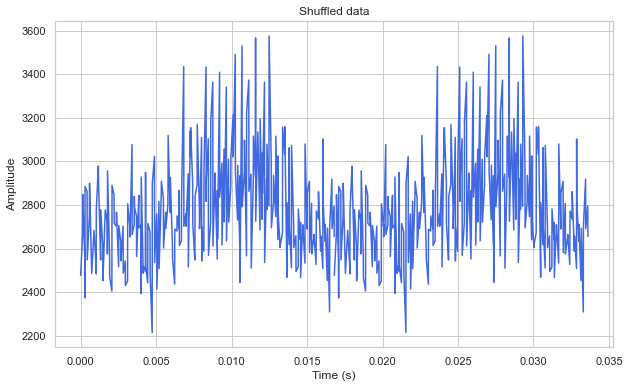

In [209]:
# Folding data
data = np.genfromtxt('pulsar.dat') #import data

def fold_data(foldfreq, time):
    foldperiod = 1/foldfreq
    foldedtime = time % foldperiod
    return foldedtime

testfreq = 59.5
foldedtime = fold_data(testfreq, time)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=foldedtime, y=data, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()



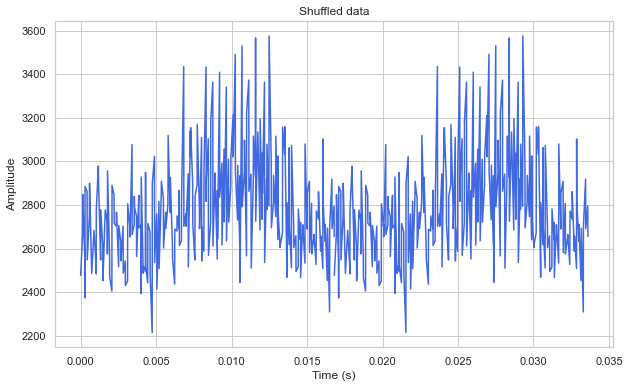

In [20]:
datus = data.copy()
tempo = foldedtime.copy()
idx   = np.argsort(tempo)

datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=tempo, y=datus, color='royalblue')
sns.lineplot(x=foldedtime + 1/testfreq, y=data, color='royalblue')
plt.title('Shuffled data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [43]:
# Do a chi squared test
import scipy.stats as stats

avg = np.average(data)
print(stats.chisquare(binned))

Power_divergenceResult(statistic=64.93468609594983, pvalue=0.00014463931355612622)


In [174]:
# Phase binning
def phase_binning(data, foldedtime, nbins, period):
    phase = foldedtime/period
    phase = phase - np.floor(phase)
    phase = np.round(phase * nbins).astype(int)
    phase_data = np.zeros(nbins)
    for i in range(nbins):
        if data[phase == i].size == 0:
            phase_data[i] = (np.mean(data[phase == i - 1]) + np.mean(data[phase == i + 1]))/2 # if no data in bin, take average of neighbouring bins
        else:
            phase_data[i] = np.mean(data[phase == i])
        # dealing with edges
        if data[phase == i].size == 0 and i == 0:
            phase_data[i] = np.mean(data[phase == i + 1])
        if data[phase == i].size == 0 and i == nbins - 1:
            phase_data[i] = np.mean(data[phase == i - 1])
    return phase_data

In [196]:
i = 0
steps = 10000
min = 59.761
max = 59.762

Allchi = np.zeros(steps)
for f in np.linspace(min, max, steps):    
    datus = data.copy()
    foldedtime = fold_data(f, time)
    tempo = foldedtime.copy()
    idx   = np.argsort(tempo)
    datus = np.array(datus)[idx]
    tempo = np.array(tempo)[idx]
    binned = phase_binning(datus, tempo, 30, 1/f)
    chi2 = stats.chisquare(binned)
    Allchi[i] = chi2[0]
    i += 1
print(Allchi)
print(np.argmax(Allchi))
print('Maximum chi2:', np.max(Allchi))
print('At Freq = ', min+np.argmax(Allchi)/(steps/(max-min)), "Hz")
Pulsarfreq = min+np.argmax(Allchi)/(steps/(max-min))


[380.02776705 380.02776705 380.02776705 ... 376.48879356 376.48879356
 376.48879356]
4327
Maximum chi2: 400.9715566559997
At Freq =  59.7614327 Hz


In [223]:
f = Pulsarfreq
datus = data.copy()
foldedtime = fold_data(f, time)
tempo = foldedtime.copy()
idx   = np.argsort(tempo)
datus = np.array(datus)[idx]
tempo = np.array(tempo)[idx]
binned = phase_binning(datus, tempo, 30, 1/f)
chi2 = stats.chisquare(binned, np.average(binned))
print(chi2)

Power_divergenceResult(statistic=400.9715566559997, pvalue=4.7304524263200365e-67)


In [157]:
binned 

array([2478.        , 2684.91666667, 2671.25      , 2657.58333333,
       2726.91666667, 2665.5       , 2706.5       , 2678.61538462,
       2989.6       , 2662.        , 2830.91666667, 2851.75      ,
       2885.625     , 2919.5       , 2921.61538462, 3013.8       ,
       2822.57142857, 2942.75      , 2892.5       , 2771.        ,
       2788.41666667, 2810.53846154, 2772.39423077, 2734.25      ,
       2647.83333333, 2694.8       , 2768.28571429, 2683.41666667,
       2624.11111111, 2734.33333333])

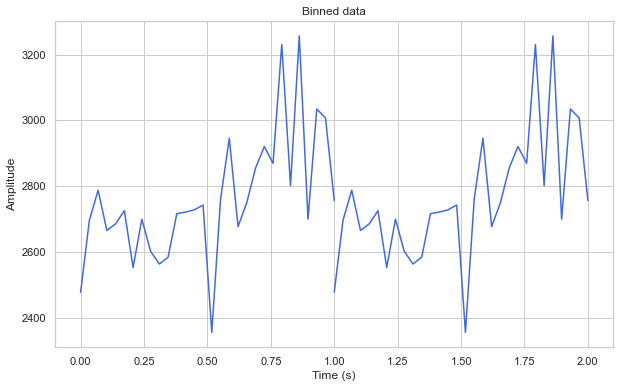

In [224]:
testfreq = Pulsarfreq
#binned = phase_binning(datus, tempo, 30, 1/testfreq)

# Plot folded data
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.linspace(0, 1, num=len(binned)), y=binned, color='royalblue')
sns.lineplot(x=np.linspace(0, 1, num=len(binned)) + 1, y=binned, color='royalblue')
plt.title('Binned data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
Most probable pulsar PSR J1748-2021B